# Prediksi Suhu Cuaca di Szeged dengan Regresi Neural Network


<!DOCTYPE html>
<html>
<head>

</head>
<body>

<h1>Prediksi Suhu Cuaca di Szeged dengan Regresi Neural Network</h1>

<p>Szeged, sebuah kota yang terletak di wilayah selatan Hungaria, memiliki iklim yang cukup bervariasi.  Memahami pola suhu di kota ini penting untuk berbagai keperluan, mulai dari perencanaan kegiatan sehari-hari hingga peramalan kebutuhan energi.  Dalam proyek ini, kita akan menggunakan kekuatan <i>machine learning</i>, khususnya regresi neural network dengan TensorFlow, untuk memprediksi suhu udara di Szeged berdasarkan data historis cuaca dari tahun 2006 hingga 2016.</p>

<p>Data yang digunakan berasal dari kumpulan data cuaca Szeged, yang mencakup berbagai variabel seperti suhu, kelembaban, kecepatan angin, dan curah hujan.  Tantangan dalam permasalahan regresi ini adalah menemukan pola kompleks dalam data historis dan membangun model yang akurat untuk memprediksi suhu masa depan.  Regresi neural network dipilih karena kemampuannya dalam mempelajari pola non-linear yang mungkin tidak dapat ditangkap oleh model regresi tradisional.</p>

<p>Proses pengembangan model dimulai dengan pra-pemrosesan data, termasuk normalisasi dan pembagian data menjadi set pelatihan dan pengujian.  Kemudian, arsitektur neural network dirancang dan dilatih menggunakan algoritma pengoptimalan yang tepat.  Performa model dievaluasi dengan metrik seperti Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE) pada set pengujian.  Semakin rendah nilai MAE dan RMSE, semakin akurat model dalam memprediksi suhu.</p>

<p>Hasil penelitian ini diharapkan dapat memberikan kontribusi dalam memahami dinamika cuaca di Szeged dan memberikan prediksi suhu yang akurat.  Model yang dikembangkan dapat diaplikasikan dalam berbagai konteks, misalnya untuk membantu perencanaan pertanian, pengaturan sistem pendingin ruangan, atau bahkan sebagai bagian dari sistem peringatan dini cuaca.</p>

<p>Penting untuk dicatat bahwa model ini hanya prediksi dan tidak dapat menggantikan pengamatan cuaca langsung.  Namun, model ini dapat memberikan informasi yang berharga sebagai pelengkap data cuaca lainnya.</p>

</body>
</html>


<a href="https://www.kaggle.com/datasets/budincsevity/szeged-weather/data"
target="_blank">Klik di sini untuk membuka dataset Student Scores di Kaggle</a>

## Datakan Data Dari Kaggle

In [1]:
# Hide for not download again

import kagglehub

# Download latest version
path = kagglehub.dataset_download("budincsevity/szeged-weather")

print("Path to dataset files:", path)

100%|██████████| 2.23M/2.23M [00:00<00:00, 68.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/budincsevity/szeged-weather/versions/1


## Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf

## Load Dataset

In [3]:
# Get the directory path containing the CSV file(s)
data_dir = '/root/.cache/kagglehub/datasets/budincsevity/szeged-weather/versions/1'

# List all files in the directory
file_list = os.listdir(data_dir)

# Filter the list to find CSV files
csv_files = [f for f in file_list if f.endswith('.csv')]

# If there are CSV files in the directory
if csv_files:
    # Read the first CSV file (assuming there's only one or you want the first)
    file_path = os.path.join(data_dir, csv_files[0])
    df = pd.read_csv(file_path)
    print(df)  # Print the DataFrame
else:
    print("No CSV files found in the directory.")

                      Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556           

df copy


In [4]:
df_1 = df.copy()

In [5]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<h2>Data yang Tersedia dalam Respons Per Jam</h2>
<p>Data cuaca per jam mencakup fitur-fitur berikut:</p>
<ul>
  <li><b>time:</b> Cap waktu yang mewakili jam pengamatan.</li>
  <li><b>summary:</b> Deskripsi singkat tentang kondisi cuaca (misalnya, "Cerah," "Sebagian Berawan," "Hujan").</li>
  <li><b>precipType:</b> Jenis presipitasi (misalnya, "hujan," "salju," atau null jika tidak ada presipitasi).</li>
  <li><b>temperature:</b> Suhu udara dalam derajat Celcius.</li>
  <li><b>apparentTemperature:</b> Suhu yang "dirasakan," dengan memperhitungkan angin dingin dan kelembaban.</li>
  <li><b>humidity:</b> Kelembaban relatif, diwakili sebagai desimal antara 0 dan 1 (misalnya, 0.7 untuk 70%).</li>
  <li><b>windSpeed:</b> Kecepatan angin dalam kilometer per jam.</li>
  <li><b>windBearing:</b> Arah angin dalam derajat (0° = Utara, 90° = Timur, dst.).</li>
  <li><b>visibility:</b> Jarak pandang dalam kilometer.</li>
  <li><b>loudCover:</b> Tutupan awan, diwakili sebagai desimal antara 0 dan 1 (misalnya, 0.5 untuk tutupan awan 50%).</li>
  <li><b>pressure:</b> Tekanan atmosfer dalam Hektopascal (hPa).</li>
</ul>





##  Data Cleaning

### Penanganan Missing Values:

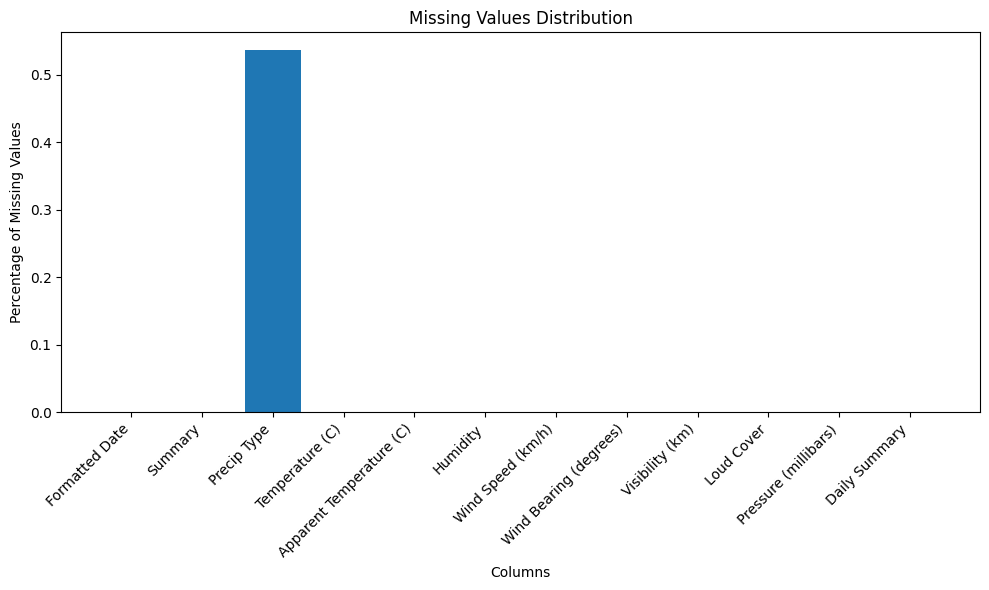

In [6]:


import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_percentages = df.isnull().sum() * 100 / len(df)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(missing_percentages.index, missing_percentages.values)
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [7]:
# Jumlah data yang hilang

missing_precip_type = df['Precip Type'].isnull().sum()
print(f"Jumlah data yang hilang pada kolom 'Precip Type': {missing_precip_type}")


Jumlah data yang hilang pada kolom 'Precip Type': 517


In [8]:

# Check the data type of 'Precip Type' column
print(df['Precip Type'].dtype)

object


In [9]:
df['Precip Type']

,Precip Type
0,rain
1,rain
2,rain
3,rain
4,rain
...,...
96448,rain
96449,rain
96450,rain
96451,rain


In [10]:
print(df['Precip Type'].unique())

['rain' 'snow' nan]


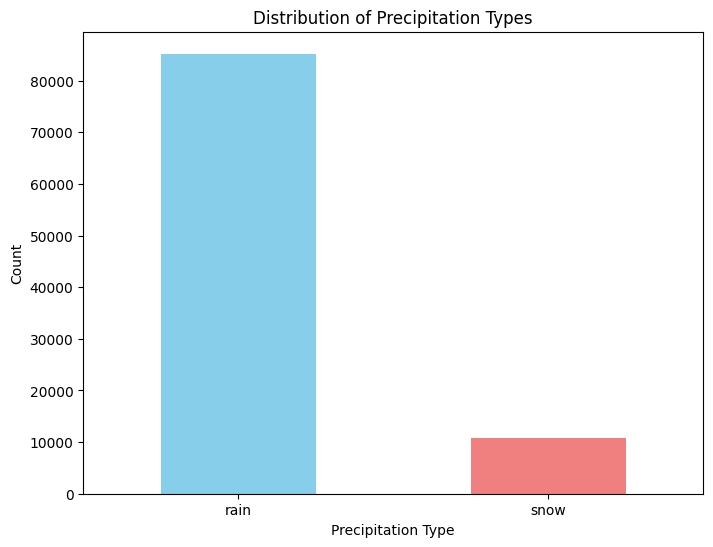

In [11]:
# Count occurrences of each precipitation type
precip_counts = df['Precip Type'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
precip_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])  # Customize colors
plt.title('Distribution of Precipitation Types')
plt.xlabel('Precipitation Type')
plt.ylabel('Count')
plt.xticks(rotation=0) # Prevent x-axis labels from overlapping
plt.show()


In [12]:
# Replace missing values in 'Precip Type' with the mode
mode_precip_type = df['Precip Type'].mode()[0]
df['Precip Type'].fillna(mode_precip_type, inplace=True)
print(df['Precip Type'].fillna(mode_precip_type, inplace=True))

# Verify the changes
print(df['Precip Type'].unique())
missing_precip_type_after = df['Precip Type'].isnull().sum()
print(f"Jumlah data yang hilang pada kolom 'Precip Type' setelah diisi: {missing_precip_type_after}")


None
['rain' 'snow']
Jumlah data yang hilang pada kolom 'Precip Type' setelah diisi: 0


#### Memastikan Penangan Missing Value Berhasil

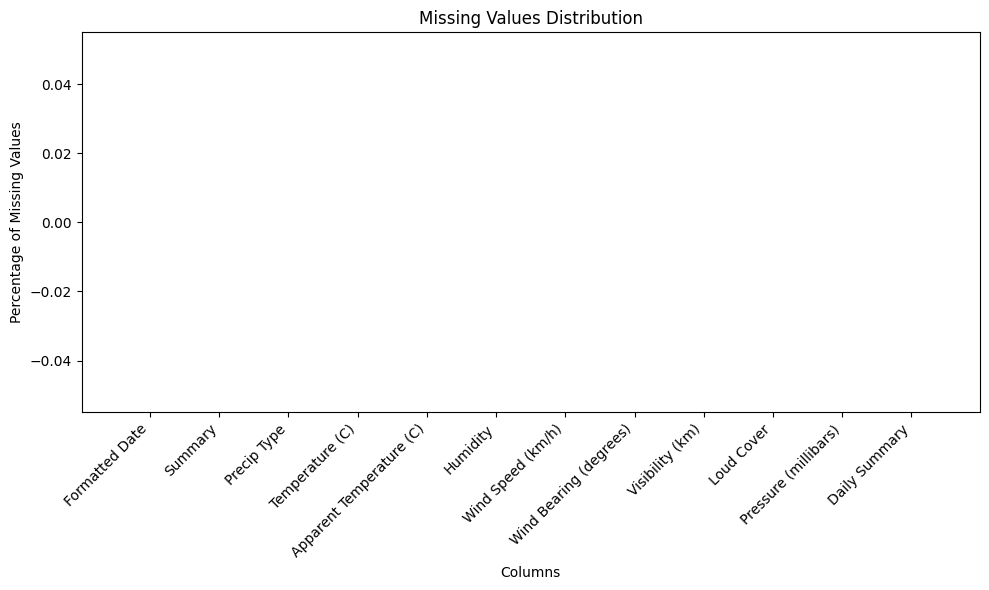

In [13]:
# Calculate the percentage of missing values for each column
missing_percentages = df.isnull().sum() * 100 / len(df)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(missing_percentages.index, missing_percentages.values)
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Deteksi dan Penanganan Outlier

#### Boxplot

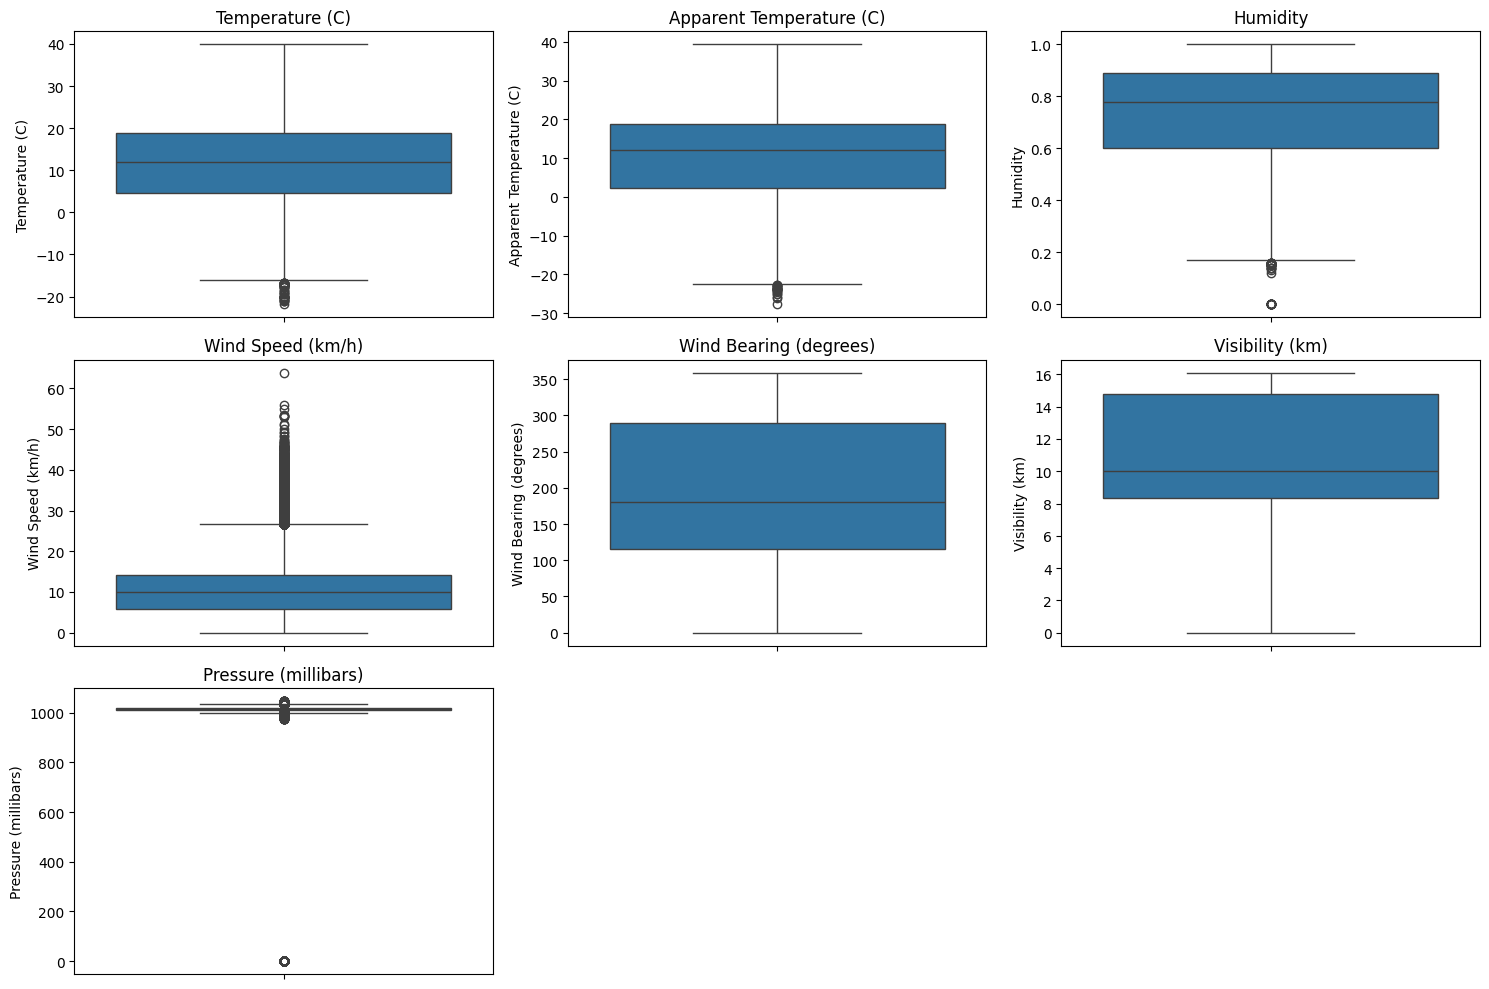

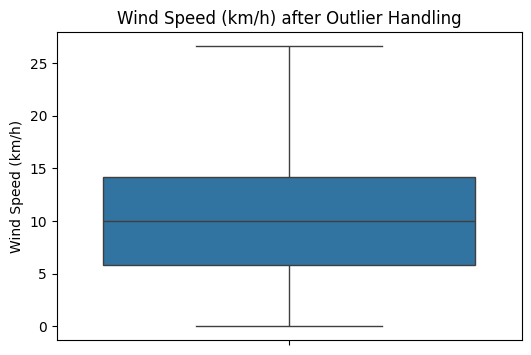

In [14]:
# prompt: Deteksi dan Penanganan Outlier Visualisasi data boxplot

import matplotlib.pyplot as plt
import numpy as np
# Create box plots for relevant numerical features
numerical_features = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


# Example: Handling outliers in 'Wind Speed (km/h)' using IQR method
Q1 = df['Wind Speed (km/h)'].quantile(0.25)
Q3 = df['Wind Speed (km/h)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
df['Wind Speed (km/h)'] = np.where(df['Wind Speed (km/h)'] > upper_bound, upper_bound, df['Wind Speed (km/h)'])
df['Wind Speed (km/h)'] = np.where(df['Wind Speed (km/h)'] < lower_bound, lower_bound, df['Wind Speed (km/h)'])

# Visualize the 'Wind Speed (km/h)' after outlier handling
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Wind Speed (km/h)'])
plt.title('Wind Speed (km/h) after Outlier Handling')
plt.show()

#You can apply similar outlier handling techniques to other numerical features as needed.


In [15]:
df.dtypes

,0
Formatted Date,object
Summary,object
Precip Type,object
Temperature (C),float64
Apparent Temperature (C),float64
Humidity,float64
Wind Speed (km/h),float64
Wind Bearing (degrees),float64
Visibility (km),float64
Loud Cover,float64


In [16]:
X = df.drop(['Temperature (C)','Formatted Date'], axis=1) # Drop beberapa fitur
y = df['Temperature (C)']

In [17]:
X.head()

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [18]:
X.dtypes

,0
Summary,object
Precip Type,object
Apparent Temperature (C),float64
Humidity,float64
Wind Speed (km/h),float64
Wind Bearing (degrees),float64
Visibility (km),float64
Loud Cover,float64
Pressure (millibars),float64
Daily Summary,object


### One Hot Encoding

In [19]:


import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the categorical columns
categorical_cols = ['Summary', 'Precip Type','Daily Summary']  # Replace with your actual categorical column names
encoder.fit(X[categorical_cols])

# Transform the categorical features into one-hot encoded features
encoded_features = encoder.transform(X[categorical_cols])

# Create a new DataFrame with the one-hot encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))


# Concatenate the encoded features with the rest of the DataFrame
X_encoded = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)
X_encoded.head()


,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,...,Daily Summary_Partly cloudy until evening.,Daily Summary_Partly cloudy until morning.,Daily Summary_Partly cloudy until night and breezy in the afternoon.,Daily Summary_Partly cloudy until night and breezy in the morning.,Daily Summary_Partly cloudy until night and breezy starting in the morning continuing until afternoon.,Daily Summary_Partly cloudy until night.,Daily Summary_Rain throughout the day.,Daily Summary_Rain until afternoon.,Daily Summary_Rain until morning.,Daily Summary_Windy in the afternoon.
0,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X = X_encoded

In [21]:
y.head()

,Temperature (C)
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556


In [22]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X), len(X_train), len(X_test)

(96453, 77162, 19291)

In [23]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
weather_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])
# 2. Compile the model
weather_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
# 3. Fitting the model
weather_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.4420 - mae: 2.4420
Epoch 2/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8000 - mae: 0.8000
Epoch 3/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8124 - mae: 0.8124
Epoch 4/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7931 - mae: 0.7931
Epoch 5/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7945 - mae: 0.7945
Epoch 6/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7869 - mae: 0.7869
Epoch 7/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7837 - mae: 0.7837
Epoch 8/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7852 - mae: 0.7852
Epoch 9/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7779 - mae: 0.7779
Epoch 10/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7795 - mae: 0.7795
Epoch 11/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7706 - mae: 0.7706
Epoch 12/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7865 - mae: 0.7865
E

In [24]:
weather_model.evaluate(X_test, y_test)

603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7214 - mae: 0.7214


[0.7198820114135742, 0.7198820114135742]

In [25]:
y_train.median(), y_train.mean()

(12.033333333333331, np.float64(11.944443796457094))

Right now it looks like our model isn't performing too well... lets's try and improve it!

To (try) improve our model. we'll run 2 experiments
1. Add an extra layer with more hidden units
2. Train for longer
3. (insert your own experiment here)

#### 1. Add an extra layer with more hidden units

In [26]:
# Set randoom Seed
tf.random.set_seed(42)

# 1. Create the model
weather_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
weather_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. fitting the model
weather_model_2.fit(X_train, y_train, epochs=20)

Epoch 1/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3.0450 - mae: 3.0450
Epoch 2/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.7084 - mae: 1.7084
Epoch 3/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.2904 - mae: 1.2904
Epoch 4/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.0819 - mae: 1.0819
Epoch 5/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.0402 - mae: 1.0402
Epoch 6/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.9364 - mae: 0.9364
Epoch 7/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.8976 - mae: 0.8976
Epoch 8/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8530 - mae: 0.8530
Epoch 9/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8310 - mae: 0.8310
Epoch 10/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8143 - mae: 0.8143
Epoch 11/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.7904 - mae: 0.7904
Epoch 12/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7818 - mae: 0.78

In [27]:
weather_model_2.evaluate(X_test, y_test)

603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7408 - mae: 0.7408


[0.7407330274581909, 0.7407330274581909]

#### 2. Train for longer

In [28]:
# Set randoom Seed
tf.random.set_seed(42)

# 1. Create the model
weather_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
weather_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. fitting the model
history = weather_model_3.fit(X_train, y_train, epochs=40)

Epoch 1/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 6.1552 - mae: 6.1552
Epoch 2/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1.5419 - mae: 1.5419
Epoch 3/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1.2944 - mae: 1.2944
Epoch 4/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.1513 - mae: 1.1513
Epoch 5/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.0731 - mae: 1.0731
Epoch 6/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.0101 - mae: 1.0101
Epoch 7/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.9206 - mae: 0.9206
Epoch 8/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8743 - mae: 0.8743
Epoch 9/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.8362 - mae: 0.8362
Epoch 10/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.8224 - mae: 0.8224
Epoch 11/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.8091 - mae: 0.8091
Epoch 12/40
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.7871 - mae: 

In [29]:
# Evaluate our third model
weather_model_3.evaluate(X_test, y_test)

603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7108 - mae: 0.7108


[0.7106043100357056, 0.7106043100357056]

Text(0.5, 0, 'epochs')

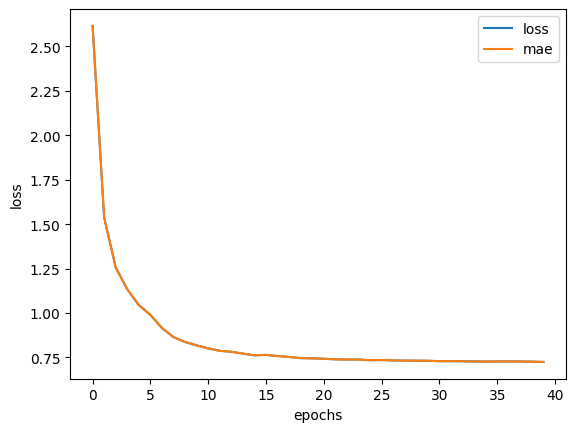

In [30]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standarization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [31]:
weather = df_1
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline # Import make_pipeline

# Define features for RobustScaler and OneHotEncoder
robust_features = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
onehot_features = ['Summary', 'Precip Type', 'Daily Summary']

# Create separate pipelines for numerical and categorical features
numerical_pipeline = make_pipeline(
    SimpleImputer(strategy='median'), # Impute missing numerical values with median
    RobustScaler()
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'), # Impute missing categorical values with most frequent
    OneHotEncoder(handle_unknown="ignore", sparse_output=False) # Set sparse_output to False
)

# Create a column transformer
ct = make_column_transformer(
    (numerical_pipeline, robust_features),
    (categorical_pipeline, onehot_features)
)

# Create X & y
X = weather.drop("Temperature (C)", axis=1)
y = weather["Temperature (C)"]

# Build our train and test sets (using the column transformer)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column tranformer to our training data
ct.fit(X_train)

# Transform training and test data with the column transformer
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [34]:
X_train.loc[0]

,0
Formatted Date,2006-04-01 00:00:00.000 +0200
Summary,Partly Cloudy
Precip Type,rain
Apparent Temperature (C),7.388889
Humidity,0.89
Wind Speed (km/h),14.1197
Wind Bearing (degrees),251.0
Visibility (km),15.8263
Loud Cover,0.0
Pressure (millibars),1015.13


In [35]:
X_train_normal[0]

array([ 0.62068966,  0.11046512, -1.04046243, -0.7625    , -0.15956284,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [36]:
X_train.shape, X_train_normal.shape

((77162, 11), (77162, 247))

In [37]:
# Build the neural network
tf.random.set_seed(42)

# 1. Create the model
weather_model_4 = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
weather_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
weather_model_4.fit(X_train_normal, y_train, epochs=20)

# Evaluate the model
weather_model_4.evaluate(X_test_normal, y_test)

Epoch 1/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.4445 - mae: 5.4445
Epoch 2/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 4.6095 - mae: 4.6095
Epoch 3/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4.5934 - mae: 4.5934
Epoch 4/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 4.5857 - mae: 4.5857
Epoch 5/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4.5788 - mae: 4.5788
Epoch 6/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.5756 - mae: 4.5756
Epoch 7/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4.5719 - mae: 4.5719
Epoch 8/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.5710 - mae: 4.5710
Epoch 9/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 4.5700 - mae: 4.5700
Epoch 10/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.5642 - mae: 4.5642
Epoch 11/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4.5633 - mae: 4.5633
Epoch 12/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 4.5619 - mae: 4.561

[4.557451248168945, 4.557451248168945]

In [38]:
# Evaluate our insurance model trained on normalized data
weather_model_4.evaluate(X_test_normal, y_test)

603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5501 - mae: 4.5501


[4.557451248168945, 4.557451248168945]


<body>

<h2>Perbandingan Model</h2>

<p>Berikut adalah perbandingan antara dua model:</p>

<h3>Model Pertama</h3>
<ul>
  <li><strong>Loss (Kerugian):</strong> 4.5501</li>
  <li><strong>MAE (Mean Absolute Error):</strong> 4.5501</li>
</ul>

<h3>Model Kedua</h3>
<ul>
  <li><strong>Loss (Kerugian):</strong> 0.7408</li>
  <li><strong>MAE (Mean Absolute Error):</strong> 0.7408</li>
</ul>

<h3>Analisis</h3>
<p>
    Dari perbandingan di atas, terlihat bahwa:
    <ul>
        <li><b>Loss (Kerugian):</b> Model kedua memiliki loss yang jauh lebih rendah (0.7408) dibandingkan model pertama (4.5501). Ini menunjukkan bahwa model kedua membuat prediksi yang lebih akurat.</li>
        <li><b>MAE (Mean Absolute Error):</b> Seperti halnya loss, model kedua memiliki MAE yang jauh lebih rendah (0.7408) dibandingkan model pertama (4.5501), yang mengkonfirmasi bahwa model kedua memiliki akurasi yang lebih baik.</li>
    </ul>
</p>

<h3>Kesimpulan</h3>
<p>Model kedua (dengan loss 0.7408 dan MAE 0.7408) jauh lebih baik daripada model pertama (dengan loss 4.5501 dan MAE 4.5501). Nilai loss dan MAE yang lebih rendah pada model kedua menunjukkan bahwa model tersebut membuat prediksi yang lebih akurat dan memiliki kinerja yang lebih baik secara keseluruhan.</p>

<p><strong>Secara sederhana:</strong> Model yang kedua, memiliki tingkat kesalahan yang jauh lebih kecil, sehingga model yang kedua jauh lebih baik dari pada model yang pertama.</p>

</body>
</html>